In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_to_json = "assignment/raw_data/transfers.jsonl"
sample = False

Load transaction data from JSONL file

In [3]:
# Load transaction data from JSONL file
df = pd.read_json(path_to_json, lines=True)
print(f"Loaded {len(df)} transactions with {df.columns.tolist()} columns")
if sample: df = df.sample(10000)
df.sample(10)

Loaded 613429 transactions with ['sender', 'recipient', 'amount', 'token', 'height', 'tx_hash'] columns


,sender,recipient,amount,token,height,tx_hash
346447,25C5xV3pY4QW7PyhJwtwLU6ZkkeZbSvG8iczqC5owcz4,DttWaMuVvTiduZRnguLF7jNxTgiMBZ1hyAumKUiL2KRL,100000,So11111111111111111111111111111111111111111,295666450,65T11zuwuYAsB4b7bicAt3yQyp1ZgFz7VghzPRhgncFRqj...
237080,F9wqPRvTewVGaMKi8h7xwLjpsV1LytvbkK8aP5nEB8DA,7ks326H4LbMVaUC8nW5FpC5EoAf5eK5pf4Dsx4HDQLpq,1000000,So11111111111111111111111111111111111111111,295666326,4VWswi2gHmrfAcbaQkA1BJciDxp9THtLba4dRzqm9qWWvD...
84152,AjdmWS2bWSDudkJTYYX9yD2mzc6Vw7AVLqeVKvrQpqLg,CebN5WGQ4jvEPvsVU4EoHEpgzq1VV7AbicfhtW4xC9iM,103005,So11111111111111111111111111111111111111111,295666151,4Z7RT11tSxhazcvmrofHafE24VvRXt4cEDUJRq3yBfhan2...
429356,AFFqng9ANhDzfhomu9WVmp1HbKha11fMrD19rdL5UfgV,5wkyL2FLEcyUUgc3UeGntHTAfWfzDrVuxMnaMm7792Gk,1000000,EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,295666540,4SXqTcqwKSgCHzxKoKxCMCpFnc4JcqPb1P6b1qPVkEUDrR...
43043,73UFrkyCgVxxjyD75NrmTsZ3wUJ2TkpJygeeRx959AMd,5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1,5279340400,9ZBYsQCNaR6Ck3KnwWwfWB4dLFKMakCuJaUGAHE8pump,295666099,cBkiujQTCEPtqHDPGkmGDU1U1Wgn8fBFwaghs6JyUjScvj...
603712,DEJzJLobJwmJA4pPdPgApJAvMzC6pvos5jSATY2oPcDy,5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1,24,So11111111111111111111111111111111111111112,295666733,3uSbu5NWKjW6AJZBNuEGMpC3x95vcoqXB4gPaZsNE3MXTh...
251516,Habp5bncMSsBC3vkChyebepym5dcTNRYeg2LVG464E96,F1Gssjdx7ZhhMzJqeBhYBJaDin4L5hugpkPwomYr7oGF,100,So11111111111111111111111111111111111111111,295666344,49NhvyumqU1VPZ7oU4J8BoSgdxNCSXNDD2Bj44CS1eKXdv...
393852,oQPnhXAbLbMuKHESaGrbXT17CyvWCpLyERSJA9HCYd7,96gYZGLnJYVFmbjzopPSU6QiEV5fGqZNyN9nmNhvrZU5,53059,So11111111111111111111111111111111111111111,295666502,4NdqCHRSNh2D6ybb7dQ9whXpBWMQ4sBhyGYhEYw3UzV6SL...
433399,ERoNYVnXDEewwPt2XaqaEzyF3wixAPAnegGY77yp6WZA,5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1,997245600,So11111111111111111111111111111111111111112,295666544,5mzYDbQxdPVf45rE9urdrjUnVmHirAYLGZLaAqG6NBAe3f...
546610,3zLBNJBp3N3cTRBt6SWMRzq3MtT6Dqms6mzj1aNg4C3Q,HFqU5x63VTqvQss8hp11i4wVV8bD44PvwucfZ2bU7gRe,1000000,So11111111111111111111111111111111111111111,295666666,4hv71ziu6qec56fEXUHkoBwvbfmygFTRY1MrmTsxC9XKHx...


Explore data types and check for missing values

In [4]:
print("\n--- Data Types and Missing Values ---")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# Convert numeric columns if needed
numeric_cols = ['amount', 'height']
for col in numeric_cols:
    if df[col].dtype == 'object':
        print(f"Converting {col} to numeric...")
        df[col] = pd.to_numeric(df[col])


--- Data Types and Missing Values ---
sender       object
recipient    object
amount        int64
token        object
height        int64
tx_hash      object
dtype: object

Missing values per column:
sender       0
recipient    0
amount       0
token        0
height       0
tx_hash      0
dtype: int64


Compute basic statistics for the dataset

In [5]:
print("\n--- Basic Statistics ---")
print("Transaction count:", len(df))
print("Unique senders:", df['sender'].nunique())
print("Unique recipients:", df['recipient'].nunique())

# Get total unique addresses (union of senders and recipients)
all_addresses = set(df['sender'].unique()).union(set(df['recipient'].unique()))
print(f"Total unique addresses: {len(all_addresses)}")

# Token statistics
print("\nToken distribution:")
token_counts = df['token'].value_counts()
print(token_counts)

# Height (time) range
min_height = df['height'].min()
max_height = df['height'].max()
print(f"\nBlock height range: {min_height} to {max_height}")
print(f"Spans approximately {max_height - min_height} blocks")

# On Solana, blocks are produced approximately every 400ms
time_span_seconds = (max_height - min_height) * 0.4
time_span_hours = time_span_seconds / 3600
time_span_minutes = time_span_seconds / 60
print(f"Estimated time span: {time_span_hours:.2f} hours ({time_span_minutes:.1f} minutes, {time_span_seconds:.1f} seconds)")

# Transaction hashes
unique_tx = df['tx_hash'].nunique()
print(f"\nUnique transaction hashes: {unique_tx}")
print(f"Transactions per hash: {len(df) / unique_tx:.2f} (average)")

# Amount statistics
print("\nTransaction amount statistics:")
print(df['amount'].describe())


--- Basic Statistics ---
Transaction count: 613429
Unique senders: 117775
Unique recipients: 127915
Total unique addresses: 172697

Token distribution:
token
So11111111111111111111111111111111111111111     355727
So11111111111111111111111111111111111111112      97322
EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v     15279
YHUk5kAege3oVdA3TQ5mnDChy9udsbSrZyYioUUKeTy       4926
9K9BEXqaRasg63YhjXmHnHF9iXNrB6QwaU1iV87pump       4619
                                                 ...  
8DapxdodaUTsMdoT1Qo83yVX2rUXvJkoQSVnZhn3pump         1
A1hbwbULs27WmKCe3mJGWucmobgdwzJgG2EbC59Spump         1
QDCYxF8hB4U6pRWdtxgMXhBvrQXFvP9TM3YoqaMVTF6          1
AFgcgCYz4TnBfgMe3BZ8Hs75bPYa6JzkxCY5B2pxpump         1
B9GtcEtFpwjXLQRzsTw9XPL7WbgdU8TnfGT4w9SSpump         1
Name: count, Length: 4573, dtype: int64

Block height range: 295666043 to 295666743
Spans approximately 700 blocks
Estimated time span: 0.08 hours (4.7 minutes, 280.0 seconds)

Unique transaction hashes: 174486
Transactions per hash: 3.

Analyze the distribution of transaction amounts


--- Transaction Amount Analysis ---


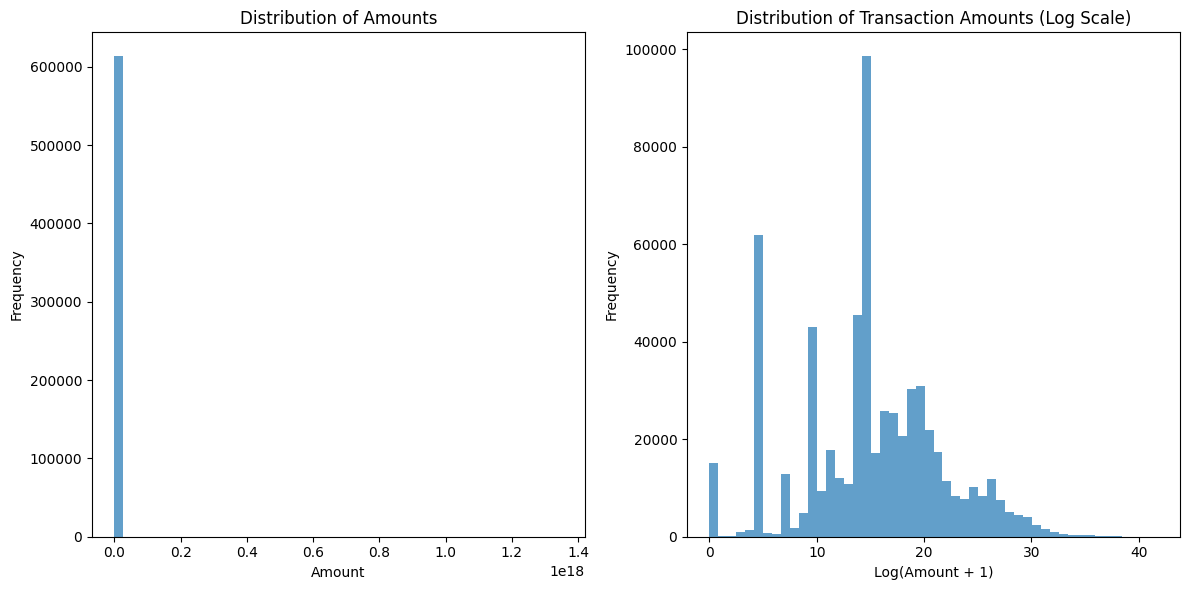

In [6]:
print("\n--- Transaction Amount Analysis ---")
    
# Convert amounts to numeric values
df['amount_numeric'] = pd.to_numeric(df['amount'])

# Create figure with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of transaction amounts (raw)
ax1.hist(df['amount_numeric'], bins=50, alpha=0.7)
ax1.set_title('Distribution of Amounts')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')

# Histogram of transaction amounts (log scale)
ax2.hist(np.log1p(df['amount_numeric']), bins=50, alpha=0.7)
ax2.set_title('Distribution of Transaction Amounts (Log Scale)')
ax2.set_xlabel('Log(Amount + 1)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('output/transaction_amounts.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

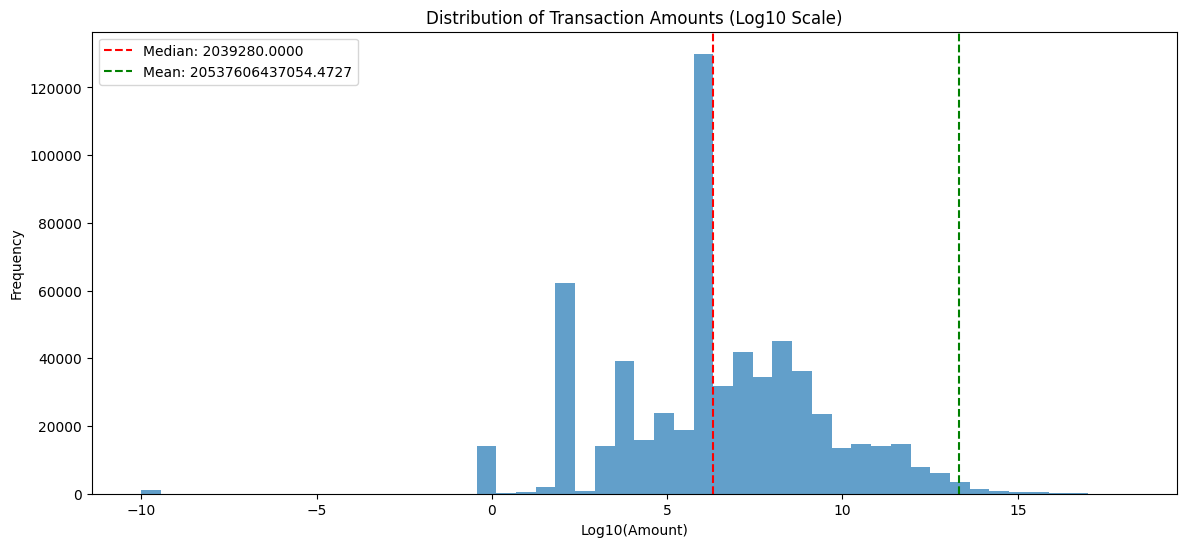

In [10]:
# Transaction amount distribution
plt.figure(figsize=(14, 6))
plt.hist(np.log10(df['amount'] + 1e-10), bins=50, alpha=0.7)
plt.title('Distribution of Transaction Amounts (Log10 Scale)')
plt.xlabel('Log10(Amount)')
plt.ylabel('Frequency')
plt.axvline(np.log10(df['amount'].median()), color='red', linestyle='--', 
            label=f'Median: {df["amount"].median():.4f}')
plt.axvline(np.log10(df['amount'].mean()), color='green', linestyle='--', 
            label=f'Mean: {df["amount"].mean():.4f}')
plt.legend()
plt.show()


--- Height and Time Analysis ---


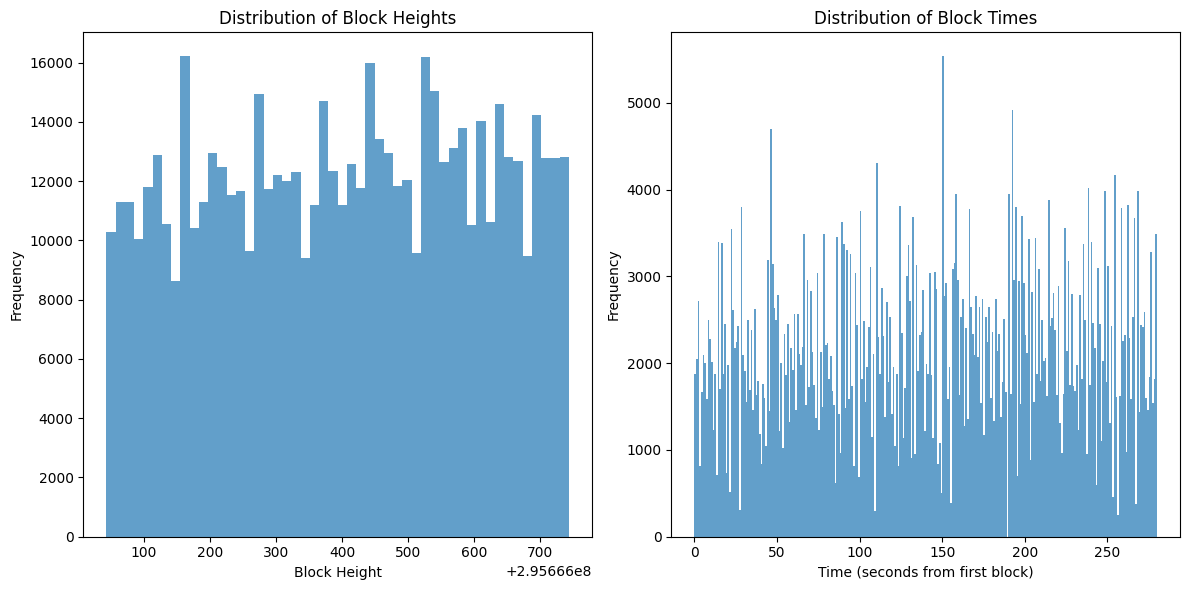

In [7]:
print("\n--- Height and Time Analysis ---")

# Create figure with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of heights
ax1.hist(df['height'], bins=50, alpha=0.7)
ax1.set_title('Distribution of Block Heights')
ax1.set_xlabel('Block Height')
ax1.set_ylabel('Frequency')

# Convert heights to seconds (400ms per block), starting from 0
time_seconds = (df['height'] - df['height'].min()) * 0.4
# Calculate number of bins based on time range to get 1 second width
n_bins = int(np.ceil(time_seconds.max() - time_seconds.min()))
ax2.hist(time_seconds, bins=n_bins, alpha=0.7)
ax2.set_title('Distribution of Block Times')
ax2.set_xlabel('Time (seconds from first block)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('output/height_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

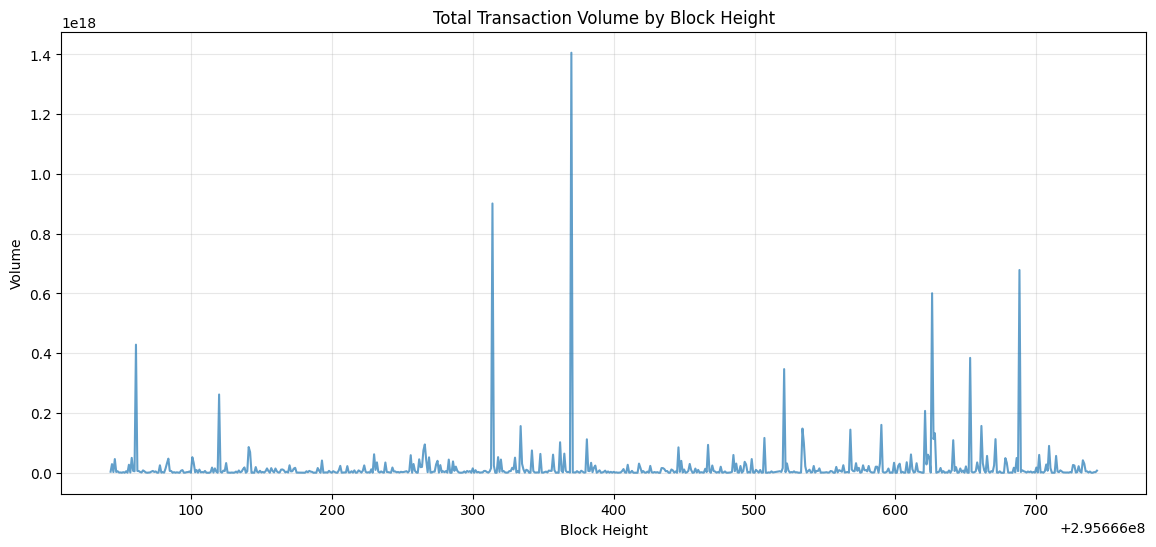

In [12]:


# Transaction volume over time
plt.figure(figsize=(14, 6))
df_by_height = df.groupby('height')['amount'].sum().reset_index()
plt.plot(df_by_height['height'], df_by_height['amount'], alpha=0.7)
plt.title('Total Transaction Volume by Block Height')
plt.xlabel('Block Height')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.show()

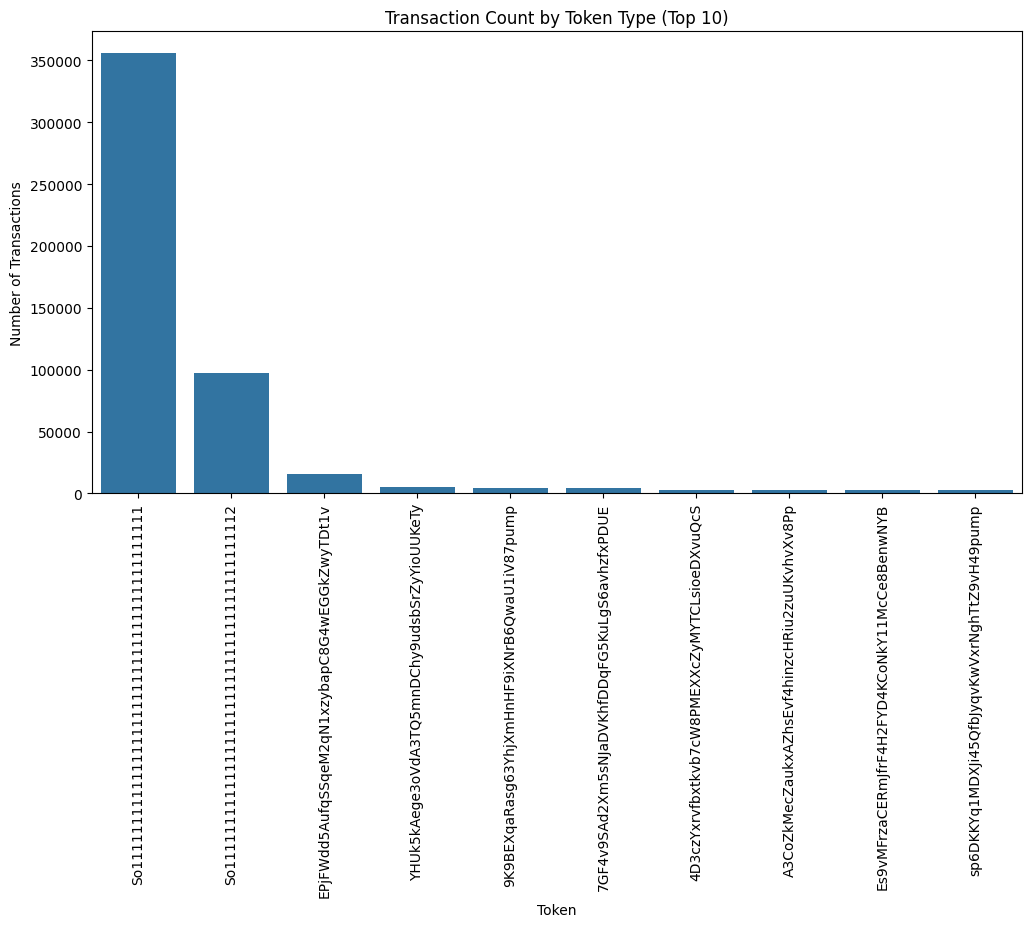

In [13]:
# Transaction count by token type
plt.figure(figsize=(12, 6))
token_counts = df['token'].value_counts().head(10)  # Top 10 tokens
sns.barplot(x=token_counts.index, y=token_counts.values)
plt.title('Transaction Count by Token Type (Top 10)')
plt.xlabel('Token')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()